In [1]:
%load_ext lab_black

In [2]:
import scanpy as sc
import scipy as sp
import numpy as np
import pandas as pd

pd.options.display.max_columns = None

sc.settings.set_figure_params(dpi=80)
sc.settings.verbosity = 3

In [3]:
adata = sc.read_h5ad("./snATAC-seq.h5ad")
adata

AnnData object with n_obs × n_vars = 46086 × 24919
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample', 'cell_type'
    var: 'features'
    obsm: 'X_umap'

In [4]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,Sample,cell_type
CK171#AGGCGTCCACCATTCC-1,0,10000.003,21275,CK171,CM
CK171#TGATCAGAGGTAAGTT-1,0,10000.021,20991,CK171,CM
CK171#TAGCATGCAAGTCTCA-1,0,9999.971,21083,CK171,CM
CK171#TACATTCCAAACCTAC-1,0,9999.961,20742,CK171,CM
CK171#CACCACTGTCGCTAGC-1,0,10000.007,21186,CK171,CM
...,...,...,...,...,...
CK355#AACAGTCAGAATGCTA-1,0,10000.013,3413,CK355,Myeloid
CK355#TGAATCGCATTTCTTG-1,0,9999.981,3014,CK355,Myeloid
CK355#AATGGCTCAGGCTACC-1,0,9999.987,3075,CK355,Lymphoid
CK355#CAGGGCTAGTGAGTTA-1,0,10000.001,3020,CK355,Myeloid


In [5]:
adata.obs.rename(
    {
        "cell_type": "cell_type_original",
        "nCount_RNA": "n_counts",
        "nFeature_RNA": "n_genes",
        "Sample": "sample",
    },
    axis="columns",
    inplace=True,
)

adata.obs.drop(
    columns=["orig.ident",], inplace=True,
)

In [6]:
adata.obs["cell_type_original"] = adata.obs["cell_type_original"].astype("category")
adata.obs["sample"] = adata.obs["sample"].astype("category")

In [7]:
adata.obs.dtypes

n_counts               float64
n_genes                  int32
sample                category
cell_type_original    category
dtype: object

In [8]:
adata.obs["cell_type_original"].replace(
    {"CM": "Cardiomyocyte", "Endo": "Endothelial", "Fib": "Fibroblast"}, inplace=True,
)

... storing 'cell_type_original' as categorical


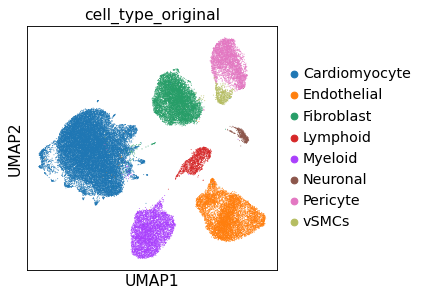

In [9]:
sc.pl.umap(adata, color="cell_type_original")

... storing 'patient' as categorical


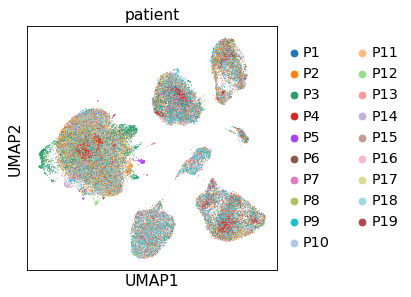

In [10]:
## update patient ID
adata.obs["patient"] = adata.obs["sample"]
adata.obs["patient"].replace(
    {
        "CK166": "P1",
        "CK170": "P4",
        "CK174": "P2",
        "CK171": "P2",
        "CK169": "P3",
        "CK168": "P3",
        "CK173": "P3",
        "CK167": "P5",
        "CK353": "P17",
        "CK381": "P17",
        "CK336": "P6",
        "CK337": "P7",
        "CK338": "P8",
        "CK339": "P2",
        "CK340": "P9",
        "CK341": "P10",
        "CK380": "P11",
        "CK343": "P9",
        "CK354": "P9",
        "CK344": "P12",
        "CK385": "P12",
        "CK386": "P13",
        "CK346": "P14",
        "CK387": "P14",
        "CK388": "P18",
        "CK389": "P19",
        "CK355": "P16",
        "CK349": "P16",
        "CK382": "P16",
        "CK336": "P6",
        "CK350": "P15",
        "CK390": "P15",
        "CK351": "P9",
        "CK383": "P9",
        "CK352": "P15",
        "CK391": "P15",
    },
    inplace=True,
)

sc.pl.umap(adata, color="patient")

... storing 'region' as categorical


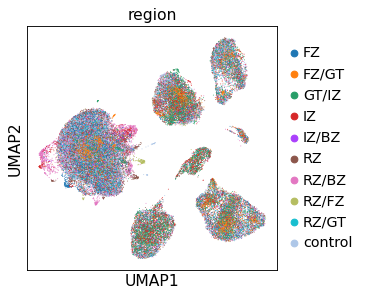

In [11]:
## update region ID
adata.obs["region"] = adata.obs["sample"]
adata.obs["region"].replace(
    {
        "CK166": "control",
        "CK170": "FZ/GT",
        "CK174": "IZ/BZ",
        "CK171": "RZ/BZ",
        "CK169": "IZ",
        "CK168": "RZ/BZ",
        "CK173": "RZ",
        "CK167": "RZ/FZ",
        "CK353": "control",
        "CK381": "control",
        "CK336": "RZ",
        "CK337": "control",
        "CK338": "control",
        "CK339": "RZ/GT",
        "CK340": "RZ",
        "CK341": "IZ",
        "CK380": "RZ",
        "CK343": "GT/IZ",
        "CK354": "GT/IZ",
        "CK344": "RZ/BZ",
        "CK385": "RZ/BZ",
        "CK386": "GT/IZ",
        "CK346": "FZ",
        "CK387": "FZ",
        "CK388": "FZ",
        "CK389": "FZ/GT",
        "CK355": "IZ",
        "CK349": "IZ",
        "CK382": "IZ",
        "CK336": "RZ",
        "CK350": "GT/IZ",
        "CK390": "GT/IZ",
        "CK351": "GT/IZ",
        "CK383": "GT/IZ",
        "CK352": "IZ",
        "CK391": "IZ",
    },
    inplace=True,
)

sc.pl.umap(adata, color="region")

... storing 'patient_region' as categorical


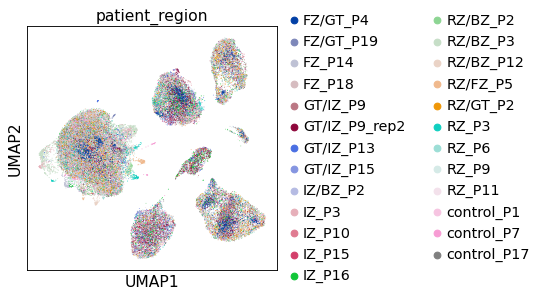

In [12]:
## update patient_region ID
adata.obs["patient_region"] = adata.obs["sample"]
adata.obs["patient_region"].replace(
    {
        "CK166": "control_P1",
        "CK170": "FZ/GT_P4",
        "CK174": "IZ/BZ_P2",
        "CK171": "RZ/BZ_P2",
        "CK169": "IZ_P3",
        "CK168": "RZ/BZ_P3",
        "CK173": "RZ_P3",
        "CK167": "RZ/FZ_P5",
        "CK353": "control_P17",
        "CK381": "control_P17",
        "CK336": "RZ_P6",
        "CK337": "control_P7",
        "CK338": "control_P7",
        "CK339": "RZ/GT_P2",
        "CK340": "RZ_P9",
        "CK341": "IZ_P10",
        "CK380": "RZ_P11",
        "CK343": "GT/IZ_P9",
        "CK354": "GT/IZ_P9",
        "CK344": "RZ/BZ_P12",
        "CK385": "RZ/BZ_P12",
        "CK386": "GT/IZ_P13",
        "CK346": "FZ_P14",
        "CK387": "FZ_P14",
        "CK388": "FZ_P18",
        "CK389": "FZ/GT_P19",
        "CK355": "IZ_P16",
        "CK349": "IZ_P16",
        "CK382": "IZ_P16",
        "CK336": "RZ_P6",
        "CK350": "GT/IZ_P15",
        "CK390": "GT/IZ_P15",
        "CK351": "GT/IZ_P9_rep2",
        "CK383": "GT/IZ_P9_rep2",
        "CK352": "IZ_P15",
        "CK391": "IZ_P15",
    },
    inplace=True,
)

sc.pl.umap(adata, color="patient_region")

... storing 'group' as categorical


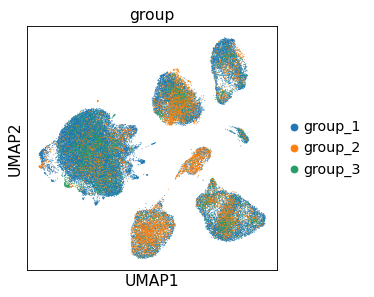

In [13]:
## update group ID
adata.obs["group"] = adata.obs["sample"]
adata.obs["group"].replace(
    {
        "CK166": "group_1",
        "CK170": "group_3",
        "CK174": "group_2",
        "CK171": "group_1",
        "CK169": "group_2",
        "CK168": "group_1",
        "CK173": "group_1",
        "CK167": "group_1",
        "CK353": "group_1",
        "CK381": "group_1",
        "CK336": "group_1",
        "CK337": "group_1",
        "CK338": "group_1",
        "CK339": "group_1",
        "CK340": "group_1",
        "CK341": "group_2",
        "CK380": "group_1",
        "CK343": "group_2",
        "CK354": "group_2",
        "CK344": "group_1",
        "CK385": "group_1",
        "CK386": "group_2",
        "CK346": "group_3",
        "CK387": "group_3",
        "CK388": "group_3",
        "CK389": "group_3",
        "CK355": "group_2",
        "CK349": "group_2",
        "CK382": "group_2",
        "CK336": "group_1",
        "CK350": "group_2",
        "CK390": "group_2",
        "CK351": "group_2",
        "CK383": "group_2",
        "CK352": "group_2",
        "CK391": "group_2",
    },
    inplace=True,
)

sc.pl.umap(adata, color="group")

In [14]:
## cell metadata
# https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/2.0.0/schema.md#obs-cell-metadata

# assay_ontology_term_id
# EFO:0030007 -> scATAC

adata.obs["assay_ontology_term_id"] = "EFO:0030007"

... storing 'assay_ontology_term_id' as categorical


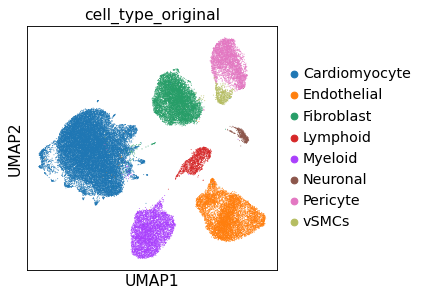

In [15]:
# cell_type_ontology_term_id
sc.pl.umap(adata, color="cell_type_original")

adata.obs["cell_type_ontology_term_id"] = adata.obs["cell_type_original"]
adata.obs["cell_type_ontology_term_id"].replace(
    {
        "Cardiomyocyte": "CL:0000513",
        "Endothelial": "CL:0010008",
        "Fibroblast": "CL:0002548",
        "Lymphoid": "CL:0000838",
        "Myeloid": "CL:0001082",
        "Neuronal": "CL:0000006",
        "Pericyte": "CL:0000669",
        "vSMCs": "CL:0000514",
    },
    inplace=True,
)

... storing 'cell_type_ontology_term_id' as categorical
... storing 'development_stage_ontology_term_id' as categorical


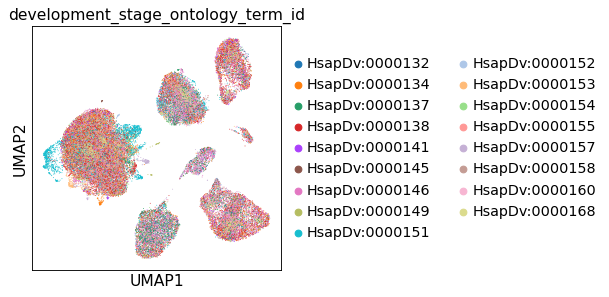

In [16]:
# development_stage_ontology_term_id
adata.obs["development_stage_ontology_term_id"] = adata.obs["sample"]
adata.obs["development_stage_ontology_term_id"].replace(
    {
        "CK166": "HsapDv:0000138",
        "CK170": "HsapDv:0000168",
        "CK174": "HsapDv:0000138",
        "CK171": "HsapDv:0000138",
        "CK169": "HsapDv:0000151",
        "CK168": "HsapDv:0000151",
        "CK173": "HsapDv:0000151",
        "CK167": "HsapDv:0000157",
        "CK353": "HsapDv:0000155",
        "CK381": "HsapDv:0000155",
        "CK336": "HsapDv:0000141",
        "CK337": "HsapDv:0000149",
        "CK338": "HsapDv:0000138",
        "CK339": "HsapDv:0000138",
        "CK340": "HsapDv:0000146",
        "CK341": "HsapDv:0000132",
        "CK380": "HsapDv:0000154",
        "CK343": "HsapDv:0000146",
        "CK354": "HsapDv:0000146",
        "CK344": "HsapDv:0000134",
        "CK385": "HsapDv:0000134",
        "CK386": "HsapDv:0000145",
        "CK346": "HsapDv:0000153",
        "CK387": "HsapDv:0000153",
        "CK388": "HsapDv:0000158",
        "CK389": "HsapDv:0000152",
        "CK355": "HsapDv:0000160",
        "CK349": "HsapDv:0000157",
        "CK382": "HsapDv:0000157",
        "CK336": "HsapDv:0000141",
        "CK350": "HsapDv:0000137",
        "CK390": "HsapDv:0000137",
        "CK351": "HsapDv:0000146",
        "CK383": "HsapDv:0000146",
        "CK352": "HsapDv:0000137",
        "CK391": "HsapDv:0000137",
    },
    inplace=True,
)

sc.pl.umap(adata, color="development_stage_ontology_term_id")

... storing 'disease_ontology_term_id' as categorical


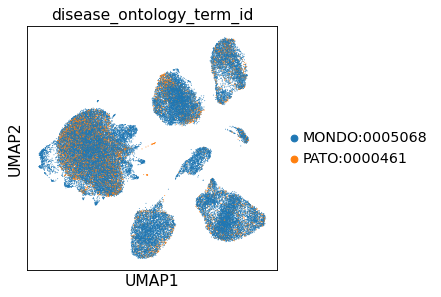

In [17]:
# disease_ontology_term_id
adata.obs["disease_ontology_term_id"] = adata.obs["sample"]
adata.obs["disease_ontology_term_id"].replace(
    {
        "CK166": "PATO:0000461",
        "CK170": "MONDO:0005068",
        "CK174": "MONDO:0005068",
        "CK171": "MONDO:0005068",
        "CK169": "MONDO:0005068",
        "CK168": "MONDO:0005068",
        "CK173": "MONDO:0005068",
        "CK167": "MONDO:0005068",
        "CK353": "PATO:0000461",
        "CK381": "PATO:0000461",
        "CK336": "MONDO:0005068",
        "CK337": "PATO:0000461",
        "CK338": "PATO:0000461",
        "CK339": "MONDO:0005068",
        "CK340": "MONDO:0005068",
        "CK341": "MONDO:0005068",
        "CK380": "MONDO:0005068",
        "CK343": "MONDO:0005068",
        "CK354": "MONDO:0005068",
        "CK344": "MONDO:0005068",
        "CK385": "MONDO:0005068",
        "CK386": "MONDO:0005068",
        "CK346": "MONDO:0005068",
        "CK387": "MONDO:0005068",
        "CK388": "MONDO:0005068",
        "CK389": "MONDO:0005068",
        "CK355": "MONDO:0005068",
        "CK349": "MONDO:0005068",
        "CK382": "MONDO:0005068",
        "CK336": "MONDO:0005068",
        "CK350": "MONDO:0005068",
        "CK390": "MONDO:0005068",
        "CK351": "MONDO:0005068",
        "CK383": "MONDO:0005068",
        "CK352": "MONDO:0005068",
        "CK391": "MONDO:0005068",
    },
    inplace=True,
)

sc.pl.umap(adata, color="disease_ontology_term_id")

In [18]:
# ethnicity_ontology_term_id
# assume all patients from Europe
# https://www.ebi.ac.uk/ols/ontologies/hancestro/terms?iri=http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FHANCESTRO_0031&viewMode=All&siblings=false
adata.obs["ethnicity_ontology_term_id"] = "HANCESTRO:0005"

In [19]:
# is_primary_data
adata.obs["is_primary_data"] = True

In [20]:
# organism_ontology_term_id
adata.obs["organism_ontology_term_id"] = "NCBITaxon:9606"

... storing 'ethnicity_ontology_term_id' as categorical
... storing 'organism_ontology_term_id' as categorical
... storing 'sex_ontology_term_id' as categorical


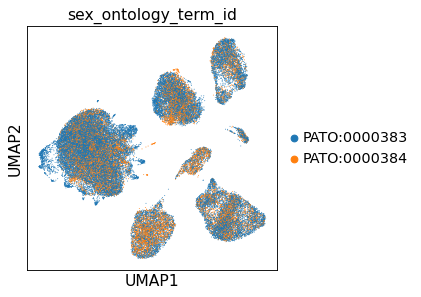

In [21]:
# sex_ontology_term_id
# PATO:0000383 -> male
# PATO:0000384 -> female
adata.obs["sex_ontology_term_id"] = adata.obs["sample"]
adata.obs["sex_ontology_term_id"].replace(
    {
        "CK166": "PATO:0000383",
        "CK170": "PATO:0000383",
        "CK174": "PATO:0000383",
        "CK171": "PATO:0000383",
        "CK169": "PATO:0000383",
        "CK168": "PATO:0000383",
        "CK173": "PATO:0000383",
        "CK167": "PATO:0000383",
        "CK353": "PATO:0000383",
        "CK381": "PATO:0000383",
        "CK336": "PATO:0000383",
        "CK337": "PATO:0000384",
        "CK338": "PATO:0000383",
        "CK339": "PATO:0000383",
        "CK340": "PATO:0000384",
        "CK341": "PATO:0000383",
        "CK380": "PATO:0000384",
        "CK343": "PATO:0000384",
        "CK354": "PATO:0000384",
        "CK344": "PATO:0000383",
        "CK385": "PATO:0000383",
        "CK386": "PATO:0000383",
        "CK346": "PATO:0000383",
        "CK387": "PATO:0000383",
        "CK388": "PATO:0000384",
        "CK389": "PATO:0000383",
        "CK355": "PATO:0000383",
        "CK349": "PATO:0000383",
        "CK382": "PATO:0000383",
        "CK336": "PATO:0000383",
        "CK350": "PATO:0000384",
        "CK390": "PATO:0000384",
        "CK351": "PATO:0000384",
        "CK383": "PATO:0000384",
        "CK352": "PATO:0000384",
        "CK391": "PATO:0000384",
    },
    inplace=True,
)

sc.pl.umap(adata, color="sex_ontology_term_id")

In [22]:
# tissue_ontology_term_id
adata.obs["tissue_ontology_term_id"] = "UBERON:0002084"

In [23]:
adata.obs

,n_counts,n_genes,sample,cell_type_original,patient,region,patient_region,group,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,ethnicity_ontology_term_id,is_primary_data,organism_ontology_term_id,sex_ontology_term_id,tissue_ontology_term_id
CK171#AGGCGTCCACCATTCC-1,10000.003,21275,CK171,Cardiomyocyte,P2,RZ/BZ,RZ/BZ_P2,group_1,EFO:0030007,CL:0000513,HsapDv:0000138,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
CK171#TGATCAGAGGTAAGTT-1,10000.021,20991,CK171,Cardiomyocyte,P2,RZ/BZ,RZ/BZ_P2,group_1,EFO:0030007,CL:0000513,HsapDv:0000138,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
CK171#TAGCATGCAAGTCTCA-1,9999.971,21083,CK171,Cardiomyocyte,P2,RZ/BZ,RZ/BZ_P2,group_1,EFO:0030007,CL:0000513,HsapDv:0000138,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
CK171#TACATTCCAAACCTAC-1,9999.961,20742,CK171,Cardiomyocyte,P2,RZ/BZ,RZ/BZ_P2,group_1,EFO:0030007,CL:0000513,HsapDv:0000138,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
CK171#CACCACTGTCGCTAGC-1,10000.007,21186,CK171,Cardiomyocyte,P2,RZ/BZ,RZ/BZ_P2,group_1,EFO:0030007,CL:0000513,HsapDv:0000138,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CK355#AACAGTCAGAATGCTA-1,10000.013,3413,CK355,Myeloid,P16,IZ,IZ_P16,group_2,EFO:0030007,CL:0001082,HsapDv:0000160,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
CK355#TGAATCGCATTTCTTG-1,9999.981,3014,CK355,Myeloid,P16,IZ,IZ_P16,group_2,EFO:0030007,CL:0001082,HsapDv:0000160,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
CK355#AATGGCTCAGGCTACC-1,9999.987,3075,CK355,Lymphoid,P16,IZ,IZ_P16,group_2,EFO:0030007,CL:0000838,HsapDv:0000160,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084
CK355#CAGGGCTAGTGAGTTA-1,10000.001,3020,CK355,Myeloid,P16,IZ,IZ_P16,group_2,EFO:0030007,CL:0001082,HsapDv:0000160,MONDO:0005068,HANCESTRO:0005,True,NCBITaxon:9606,PATO:0000383,UBERON:0002084


In [30]:
adata.obs.dtypes

n_counts                               float64
n_genes                                  int32
sample                                category
cell_type_original                    category
patient                               category
region                                category
patient_region                        category
group                                 category
assay_ontology_term_id                category
cell_type_ontology_term_id            category
development_stage_ontology_term_id    category
disease_ontology_term_id              category
ethnicity_ontology_term_id            category
is_primary_data                           bool
organism_ontology_term_id             category
sex_ontology_term_id                  category
tissue_ontology_term_id               category
dtype: object

In [24]:
# update Gene Metadata
# feature_biotype
adata.var["feature_biotype"] = "gene"

# feature_id
# adata.var["feature_id"] = "gene"

# feature_is_filtered
adata.var["feature_is_filtered"] = False

adata.var.drop(
    columns=["features",], inplace=True,
)

In [25]:
adata.var

,feature_biotype,feature_is_filtered
OR4F5,gene,False
LOC729737,gene,False
LOC101928626,gene,False
FAM87B,gene,False
LINC01128,gene,False
...,...,...
RAB39B,gene,False
CLIC2,gene,False
H2AFB1,gene,False
F8A2,gene,False


In [26]:
adata.raw.var["feature_biotype"] = "gene"
adata.raw.var.index = adata.var.index
adata.raw.var

,_index,feature_biotype
OR4F5,OR4F5,gene
LOC729737,LOC729737,gene
LOC101928626,LOC101928626,gene
FAM87B,FAM87B,gene
LINC01128,LINC01128,gene
...,...,...
RAB39B,RAB39B,gene
CLIC2,CLIC2,gene
H2AFB1,H2AFB1,gene
F8A2,F8A2,gene


In [27]:
adata.raw.var.drop(
    columns=["_index",], inplace=True,
)

adata.raw.var

,feature_biotype
OR4F5,gene
LOC729737,gene
LOC101928626,gene
FAM87B,gene
LINC01128,gene
...,...
RAB39B,gene
CLIC2,gene
H2AFB1,gene
F8A2,gene


In [28]:
# Dataset Metadata

# schema_version
adata.uns["schema_version"] = "2.0.0"

# title
adata.uns["title"] = "All-snATAC-Spatial multi-omic map of human myocardial infarction"

# X_normalization
adata.uns["X_normalization"] = "LogNormalization"

# batch_condition
adata.uns["batch_condition"] = ["sample"]

# default_embedding
adata.uns["default_embedding"] = "X_umap"

# X_approximate_distribution
adata.uns["X_approximate_distribution"] = "normal"

In [29]:
adata.write("./snATAC-seq-submission.h5ad")

... storing 'tissue_ontology_term_id' as categorical
... storing 'feature_biotype' as categorical
... storing 'feature_biotype' as categorical
